In [1]:
# Importing Data
import pandas as pd
brewing_materials = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewing_materials.csv')
beer_taxed = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_taxed.csv')
brewer_size = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewer_size.csv')
beer_states = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/beer_states.csv')

In [2]:
from IPython.display import display

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import datetime

In [66]:
import numpy as np

In [5]:
# Uploading State Abbreviations to State Names File
# The file is taken from https://github.com/jasonong/List-of-US-States/blob/master/states.csv
state_names = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
state_names.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


First let us explore the statewise beer production

In [6]:
beer_states.head()

,state,year,barrels,type
0,AK,2008,2067.69,On Premises
1,AK,2009,2263.65,On Premises
2,AK,2010,1929.15,On Premises
3,AK,2011,2251.02,On Premises
4,AK,2012,2312.43,On Premises


The data contains production of beer in barrels across sevral types for each state 

In [7]:
beer_states.shape

(1872, 4)

No missing values are present in beer states

In [8]:
beer_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   state    1872 non-null   object 
 1   year     1872 non-null   int64  
 2   barrels  1853 non-null   float64
 3   type     1872 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ KB


Let's check whether there are any duplicate record present in beer states file

In [9]:
beer_states[beer_states.duplicated(keep=False)]

,state,year,barrels,type


No duplicate records are present

Let's check unique records for each of the columns

In [10]:
beer_states.state.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'total'], dtype=object)

- It can be seen that there is one column which contains total of all states
- For further analysis the `beer_states` will be split into two part: `statewise_production` and `total_production`

But before that lets see the unique value for all the different qualitiative columns

In [11]:
beer_states.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019])

In [12]:
beer_states.type.unique()

array(['On Premises', 'Bottles and Cans', 'Kegs and Barrels'],
      dtype=object)

In [13]:
# Spliting the data
cond = beer_states['state'] == 'total'
statewise_production = beer_states.loc[~cond,:]
statewise_production.shape

(1836, 4)

In [14]:
total_production = beer_states.loc[cond,:]
total_production

,state,year,barrels,type
612,total,2008,4.671481e+05,On Premises
613,total,2009,4.679650e+05,On Premises
614,total,2010,5.136219e+05,On Premises
615,total,2011,5.490671e+05,On Premises
616,total,2012,5.509029e+05,On Premises
617,total,2013,5.748606e+05,On Premises
618,total,2014,6.682843e+05,On Premises
619,total,2015,1.275921e+06,On Premises
620,total,2016,2.014125e+06,On Premises
621,total,2017,2.656898e+06,On Premises


For `statewise_production` we will merge the full state name where instead of abbrevations. For this we will merge `statewise_production` with `state_names` file

In [15]:
statewise_production_2 = pd.merge(statewise_production, state_names, left_on= 'state',right_on = 'Abbreviation', how = 'left')
statewise_production_2.head()

,state,year,barrels,type,State,Abbreviation
0,AK,2008,2067.69,On Premises,Alaska,AK
1,AK,2009,2263.65,On Premises,Alaska,AK
2,AK,2010,1929.15,On Premises,Alaska,AK
3,AK,2011,2251.02,On Premises,Alaska,AK
4,AK,2012,2312.43,On Premises,Alaska,AK


In [16]:
columns = ['Abbreviation']
statewise_production_2.drop(columns, inplace=True, axis=1)
statewise_production_2

,state,year,barrels,type,State
0,AK,2008,2067.69,On Premises,Alaska
1,AK,2009,2263.65,On Premises,Alaska
2,AK,2010,1929.15,On Premises,Alaska
3,AK,2011,2251.02,On Premises,Alaska
4,AK,2012,2312.43,On Premises,Alaska
...,...,...,...,...,...
1831,WY,2015,9671.70,Kegs and Barrels,Wyoming
1832,WY,2016,8328.08,Kegs and Barrels,Wyoming
1833,WY,2017,8312.15,Kegs and Barrels,Wyoming
1834,WY,2018,16731.39,Kegs and Barrels,Wyoming


In [17]:
statewise_production_2.shape

(1836, 5)

In [18]:
statewise_production_2.State.unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

Yearwise beer production for each state

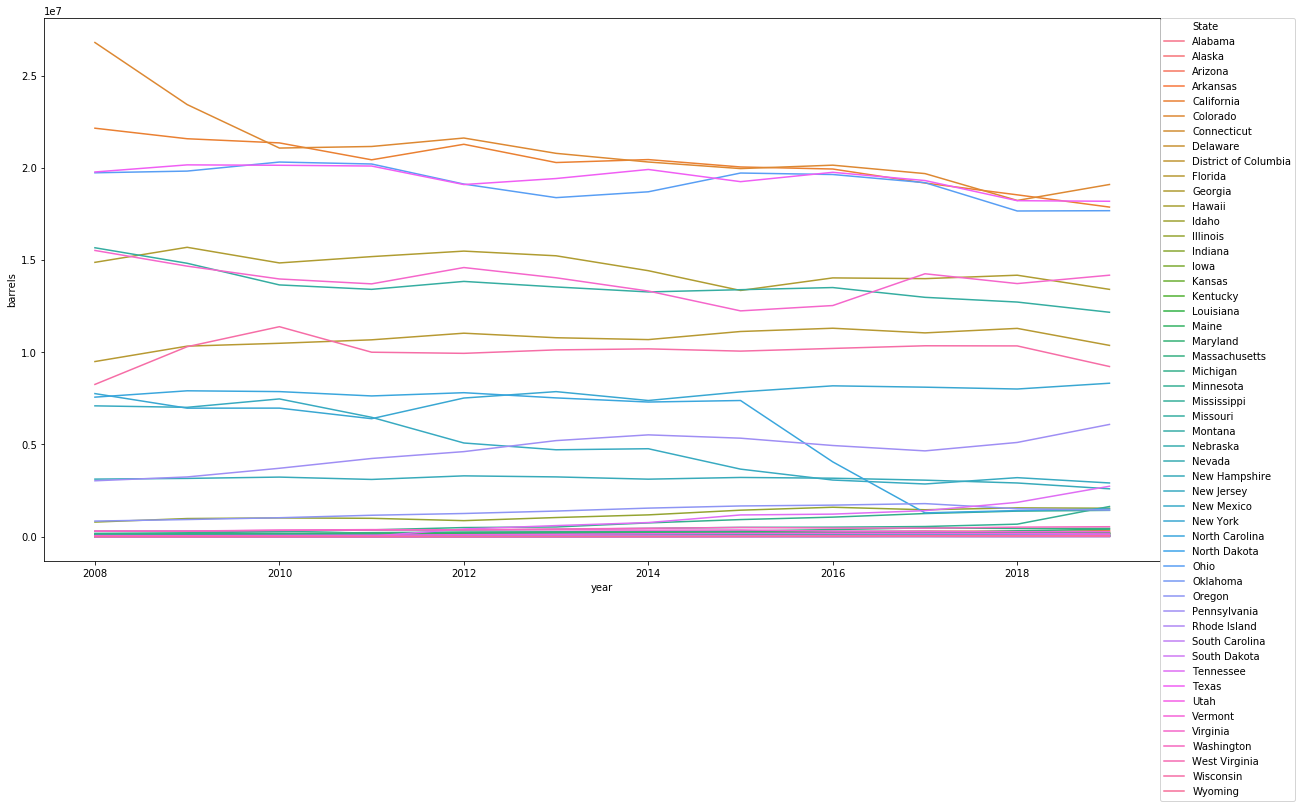

In [19]:
yearwise_prod = statewise_production_2.groupby(['State','year'])['barrels'].sum().reset_index()
plt.figure(figsize = (20,10))
sns.lineplot(x = yearwise_prod['year'], y = yearwise_prod['barrels'], hue = yearwise_prod['State'] )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

The above visualization is not clear because we have visualized the beer production for all 50 states. Lets just visualize the beer production over the past 12 years for top 5 states in 2019

In [22]:
top_5_state = yearwise_prod[yearwise_prod.year == 2019].nlargest(5,'barrels').State.tolist()
top_5_state

['Colorado', 'Texas', 'California', 'Ohio', 'Virginia']

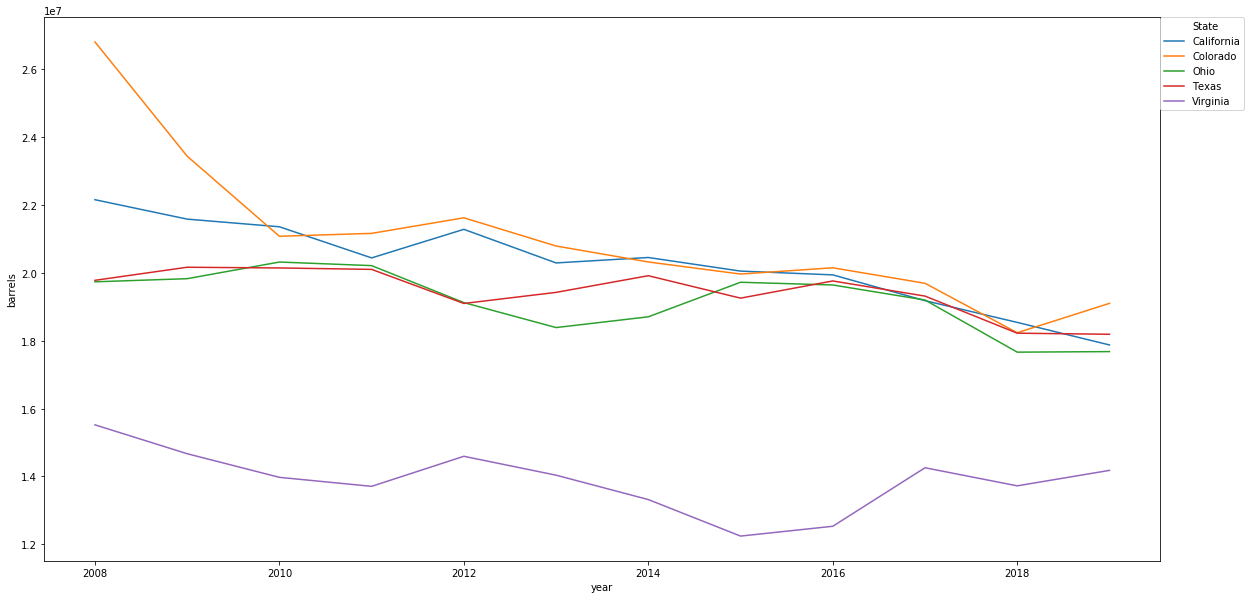

In [23]:
yearwise_prod_top_5 = yearwise_prod[yearwise_prod['State'].isin(top_5_state)]
plt.figure(figsize = (20,10))
sns.lineplot(x = yearwise_prod_top_5['year'], y = yearwise_prod_top_5['barrels'], hue = yearwise_prod_top_5['State'] )
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

- It can be seen that there is decrease in beer production in top 4 states over last 12 years.

Now let's see the trend in total production of beer across US from 2008 to 2012

We will plot the stacked bar graph indicating the contirbution of each type in beer production over the years

To plot stacked bar graph we will first pivot the type as columns and assign value of beer production in it

In [24]:
total_prod_pivot = total_production.pivot(index='year', columns='type', values='barrels')
total_prod_pivot

type,Bottles and Cans,Kegs and Barrels,On Premises
year,,,
2008,1.669300e+08,17285670.24,467148.07
2009,1.654322e+08,17461286.16,467964.96
2010,1.629721e+08,17725898.72,513621.90
2011,1.597082e+08,17817251.15,549067.09
2012,1.616927e+08,18157777.56,550902.89
2013,1.594136e+08,18097967.51,574860.64
2014,1.585425e+08,18176128.25,668284.27
2015,1.570146e+08,17750504.62,1275921.04
2016,1.554157e+08,17000382.28,2014125.21


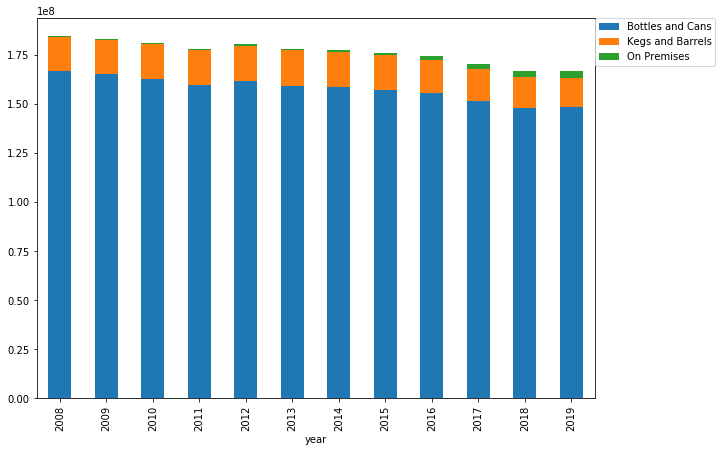

In [25]:
total_prod_pivot.loc[:,['Bottles and Cans','Kegs and Barrels', 'On Premises']].plot.bar(stacked=True, figsize=(10,7))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

- We can see that there is overall decrease in the beer production over the years
- Also, the majorty of beer produced is used in Bottles and Cans followed by Kegs and Barrels and least consumption is on premises

# Exploratory Data Analysis - Brewing Materials

- Brewing Data has the information about the materials that are used for Brewing starting 2008 till 2017 and also split across the months.   
- The data set contains a column 'type' that gives the information about the materials required for the beer production. 
- There are two major classes of materials requrired -  Grain Products and Non - Grain Prodcuts. 
- Grain products are Barley and barley products, Rice and rice products, Wheat and wheat products, Corn and corn products & Malt and malt products
- Non-Grain products are Sugar and syrups, Hops(dry), Hops(Used as extract) & other minor products
- We will do a exploratory data analysis to see how these different materials are used in the beer production. 

In [26]:
brewing_materials.tail()

,data_type,material_type,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year
1435,Pounds of Materials Used,Non-Grain Products,2017,12,Hops (dry),1453024,3040143,NaN,NaN
1436,Pounds of Materials Used,Non-Grain Products,2017,12,Hops (used as extracts),2117,29141,NaN,NaN
1437,Pounds of Materials Used,Non-Grain Products,2017,12,Other,657306,4048091,NaN,NaN
1438,Pounds of Materials Used,Total Non-Grain products,2017,12,Total Non-Grain products,2148660,7759483,NaN,NaN
1439,Pounds of Materials Used,Total Used,2017,12,Total Used,16027407,130675938,NaN,NaN


In [27]:
# Checking for NA's in the data
display(brewing_materials.isnull().any())

data_type           False
material_type       False
year                False
month               False
type                False
month_current       False
month_prior_year    False
ytd_current          True
ytd_prior_year       True
dtype: bool

- There are NA values in the columns 'ytd_current' and 'ytd_prior_year'. 
- We won't using those columns as these columns has the cummulative sum of 'month_current' and 'month_prior_current'. 
- Thus, we will only be using the month level data and keeping the year level totals as it is. 

In [31]:
brewing_filtered = brewing_materials.loc[(brewing_materials['type'] != 'Total Grain products') & 
                      (brewing_materials['type'] != 'Total Non-Grain products') &
                     (brewing_materials['type'] != 'Total Used')]

- First we would like to see how different raw materials are used in beer prodcution using visualization. 
- The type column has a categories 'Total Grain products', 'Total Non Grain products' and 'Total Used'. These total columns represent the totals of different categories and overall total products used. We have filtered them from the data as we are interested in looking only at the unique product use.  
- Below aggregation shows the use of all products at a year level and product level

In [32]:
materials_agg = brewing_filtered.groupby(['year','type'], as_index = False).agg({'month_current':['sum']})
materials_agg.columns = materials_agg.columns.droplevel(1)
materials_agg

,year,type,month_current
0,2008,Barley and barley products,58048335
1,2008,Corn and corn products,726766392
2,2008,Hops (dry),54889519
3,2008,Hops (used as extracts),6019292
4,2008,Malt and malt products,4497468603
...,...,...,...
85,2017,Malt and malt products,112425009
86,2017,Other,4046586
87,2017,Rice and rice products,1853842
88,2017,Sugar and syrups,636659


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

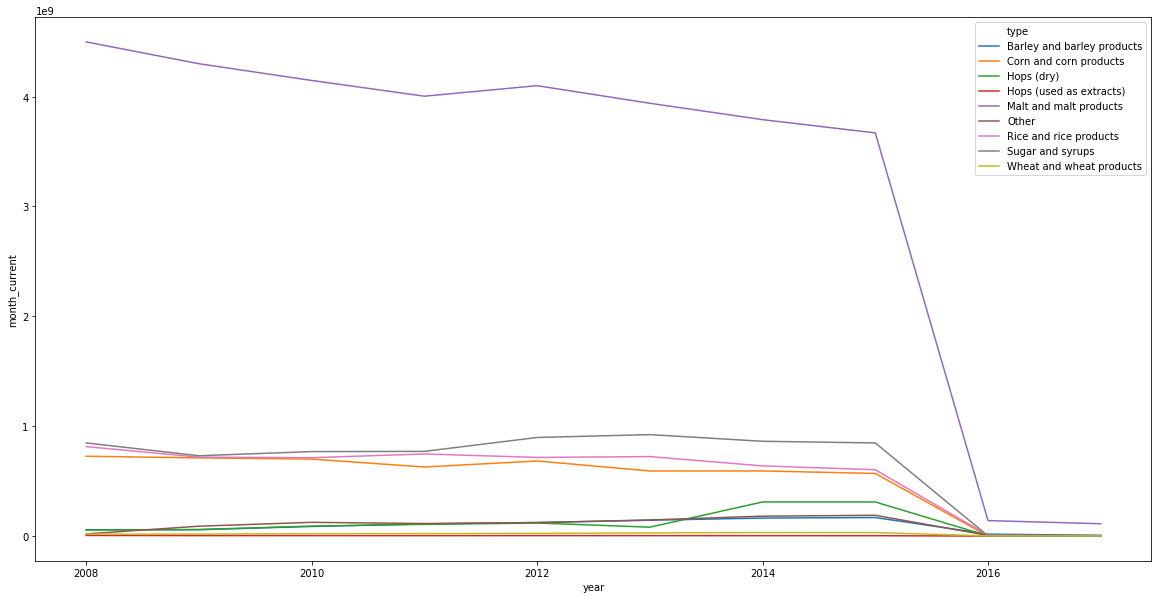

In [33]:
plt.figure(figsize=(20,10));
sns.lineplot(x="year", y="month_current", hue="type", data=materials_agg);

- We observed that there has been a drastic decrease in the use of some of the products in the years post 2016.
- It is seen that 'Malt and malt products' is the most used material in beer production. 
- Sugar and syrups, Rice and rice products & Corn and corn prodcuts are then used most and almost in same quantities.  
- We will now be aggregating the material use at month level and plot the same graph to see if there is any seasonality on the use of material use

In [34]:
# To check the seasonality
materials_agg_1 = brewing_filtered.groupby(['month','type'], as_index = False).agg({'month_current':['sum']})
materials_agg_1.columns = materials_agg_1.columns.droplevel(1)
materials_agg_1

,month,type,month_current
0,1,Barley and barley products,45842239
1,1,Corn and corn products,468483639
2,1,Hops (dry),39499855
3,1,Hops (used as extracts),2743003
4,1,Malt and malt products,2681616494
...,...,...,...
103,12,Malt and malt products,2127865453
104,12,Other,54819894
105,12,Rice and rice products,388982394
106,12,Sugar and syrups,324253451


- Most of the materials do not show much variance in their use accross the months
- There is slight variance in the use of 'Malt and malt products' accorss the month

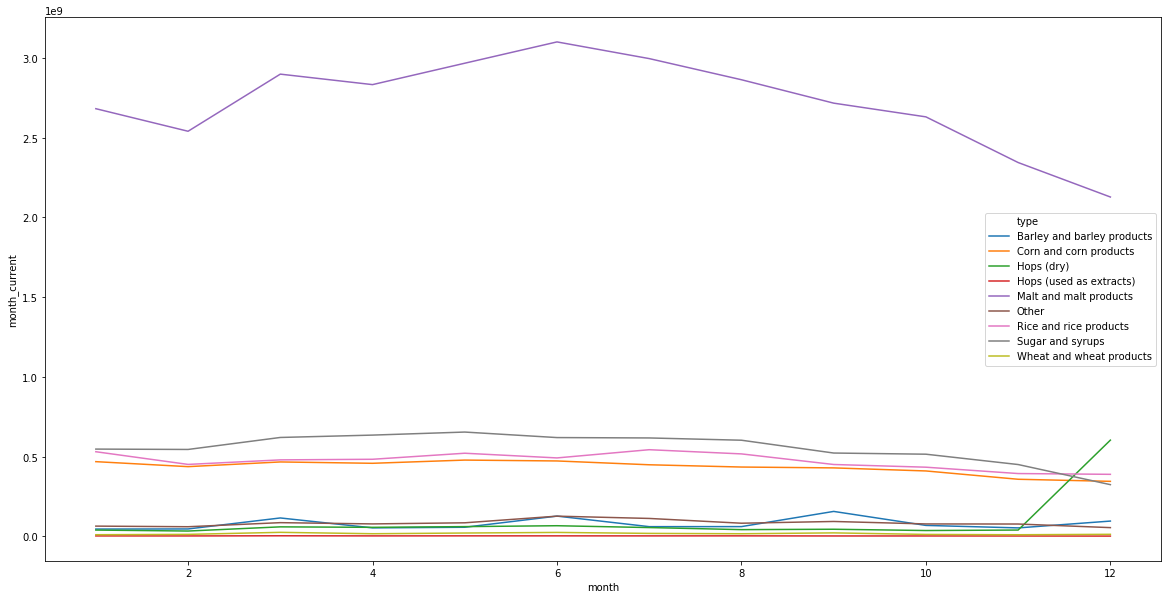

In [31]:
plt.figure(figsize=(20,10));
sns.lineplot(x="month", y="month_current", hue="type", data=materials_agg_1);

- We have a data set `beer_taxed` that has the information of number of beer barrels produced by months starting from 2008 to 2017. 
- Now, we are interested in fitting a model that will predict the number of beer barrels produced using the amount of materials used 
- We will merge the two data sets for model building 
- We will create an id using the month and the year to get the observations of beer barrels produced and materials used at the month-year level

In [35]:
# Concatinating Year and Month to create ID - Brewing Data
brewing_materials['id'] = brewing_materials['year'].astype(str) + str('_') + brewing_materials['month'].astype(str)
brewing_materials['id']

0        2008_1
1        2008_1
2        2008_1
3        2008_1
4        2008_1
         ...   
1435    2017_12
1436    2017_12
1437    2017_12
1438    2017_12
1439    2017_12
Name: id, Length: 1440, dtype: object

- Dataset `brewing_materials` is a long data set. We will first convert it wide data set using the pivot function. 
- We will split the use of different type of materials at month-year level

In [36]:
# Pivoting Brewing Materials data

pivoted_brewing_materials = brewing_materials.pivot(index = 'id', columns = 'type', values = 'month_current')
pivoted_brewing_materials

type,Barley and barley products,Corn and corn products,Hops (dry),Hops (used as extracts),Malt and malt products,Other,Rice and rice products,Sugar and syrups,Total Grain products,Total Non-Grain products,Total Used,Wheat and wheat products
id,,,,,,,,,,,,
2008_1,3800844,57563519,4506546,621912,374165152,1291615,72402143,78358212,509108844,84778285,593887129,1177186
2008_10,3825118,63047343,3788949,337430,353803777,1568462,58607059,42828943,480715200,48523784,529238984,1431903
2008_11,3309266,53628776,3897905,329906,322733711,1247790,53971515,44000736,434602496,49476337,484078833,959228
2008_12,6152633,49919452,1576751,272045,318741733,1574456,61716256,38952441,437878833,42375693,480254526,1348759
2008_2,3236714,59513161,1815271,476688,355687578,1599119,66061597,80188744,485740033,84079822,569819855,1240983
...,...,...,...,...,...,...,...,...,...,...,...,...
2017_5,183174,1642,147645,1939,10242822,74380,1849,24725,10466338,248689,10715027,36851
2017_6,1333243,4584,251754,3152,12936288,1223682,4901,57026,14514033,1535614,16049647,235017
2017_7,175807,125,136540,1850,8321067,42006,1532,23179,8533719,203575,8737294,35188


In [34]:
beer_taxed.head()

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,16211480.0,15880125.0,$7/$18 per barrel
1,Barrels Produced,Taxable,2008,1,In bottles and cans,13222104,12824278,13222104.0,12824278.0,$7/$18 per barrel
2,Barrels Produced,Taxable,2008,1,In barrels and kegs,1371239,1357372,1371239.0,1357372.0,$7/$18 per barrel
3,Barrels Produced,Taxable,2008,1,"Tax Determined, Premises Use",7426,8419,7426.0,8419.0,$7/$18 per barrel
4,Barrels Produced,Sub Total Taxable,2008,1,Sub Total Taxable,14600769,14190069,14600769.0,14190069.0,$7/$18 per barrel


In [37]:
# Concatinating Year and Month to create ID - Brewing Data

beer_taxed['id'] = beer_taxed['year'].astype(str) + str('_') + beer_taxed['month'].astype(str)
beer_taxed['id']

0        2008_1
1        2008_1
2        2008_1
3        2008_1
4        2008_1
         ...   
1575    2019_12
1576    2019_12
1577    2019_12
1578    2019_12
1579    2019_12
Name: id, Length: 1580, dtype: object

In [41]:
# Processing Beer Taxed Data Set

# Filtering for to get month wise barrel production

beer_taxed_filtered = beer_taxed.loc[(beer_taxed['tax_status'] == 'Totals') & 
                      (beer_taxed['type'] == 'Production') ]
beer_taxed_filtered

,data_type,tax_status,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year,tax_rate,id
0,Barrels Produced,Totals,2008,1,Production,16211480,15880125,16211480.0,15880125.0,$7/$18 per barrel,2008_1
11,Barrels Produced,Totals,2008,2,Production,15690494,15284087,31909489.0,31164212.0,$7/$18 per barrel,2008_2
22,Barrels Produced,Totals,2008,3,Production,17367476,17388588,49277784.0,48552848.0,$7/$18 per barrel,2008_3
33,Barrels Produced,Totals,2008,4,Production,17254160,16777943,66535007.0,65331867.0,$7/$18 per barrel,2008_4
44,Barrels Produced,Totals,2008,5,Production,18269043,18465892,84810051.0,83798440.0,$7/$18 per barrel,2008_5
...,...,...,...,...,...,...,...,...,...,...,...
1525,Barrels Produced,Totals,2019,8,Production,15359693,16944015,121082009.0,127395843.0,$3.50/$16 per barrel,2019_8
1536,Barrels Produced,Totals,2019,9,Production,15378683,15463120,136624519.0,142879231.0,$3.50/$16 per barrel,2019_9
1547,Barrels Produced,Totals,2019,10,Production,14344526,14041040,150911244.0,156915916.0,$3.50/$16 per barrel,2019_10
1558,Barrels Produced,Totals,2019,11,Production,12645622,12748191,163711735.0,169677500.0,$3.50/$16 per barrel,2019_11


In [42]:
# Merging pivoted_brewing_materials and Beer_taxed_filtered
barrels_raw_material = pd.merge(pivoted_brewing_materials,beer_taxed_filtered[['id','month_current']], on = 'id', how='left')
barrels_raw_material.head()

,id,Barley and barley products,Corn and corn products,Hops (dry),Hops (used as extracts),Malt and malt products,Other,Rice and rice products,Sugar and syrups,Total Grain products,Total Non-Grain products,Total Used,Wheat and wheat products,month_current
0,2008_1,3800844,57563519,4506546,621912,374165152,1291615,72402143,78358212,509108844,84778285,593887129,1177186,16211480
1,2008_10,3825118,63047343,3788949,337430,353803777,1568462,58607059,42828943,480715200,48523784,529238984,1431903,15951285
2,2008_11,3309266,53628776,3897905,329906,322733711,1247790,53971515,44000736,434602496,49476337,484078833,959228,14301054
3,2008_12,6152633,49919452,1576751,272045,318741733,1574456,61716256,38952441,437878833,42375693,480254526,1348759,13961733
4,2008_2,3236714,59513161,1815271,476688,355687578,1599119,66061597,80188744,485740033,84079822,569819855,1240983,15690494


In [43]:
# Fitting Linear Model 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
barrels_raw_material.columns

Index(['id', 'Barley and barley products', 'Corn and corn products',
       'Hops (dry)', 'Hops (used as extracts)', 'Malt and malt products',
       'Other', 'Rice and rice products', 'Sugar and syrups',
       'Total Grain products', 'Total Non-Grain products', 'Total Used',
       'Wheat and wheat products', 'month_current'],
      dtype='object')

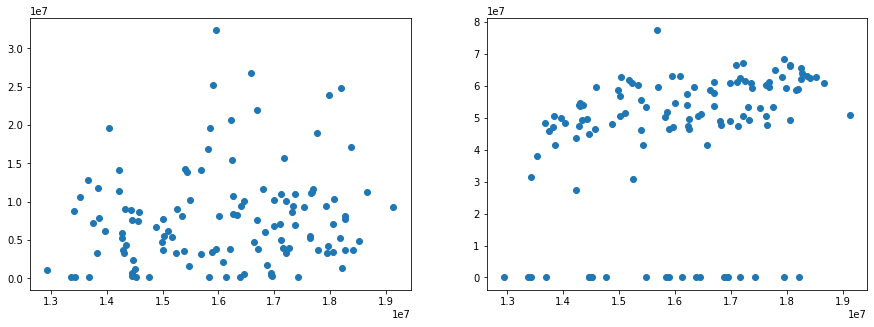

In [45]:
# ScatterPlots of Production Quantity with all other variables
fig, ax = plt.subplots(1,2,figsize=(15,5)) 

ax[0].scatter('month_current', 'Barley and barley products', data = barrels_raw_material) 
ax[1].scatter('month_current', 'Corn and corn products', data = barrels_raw_material); 

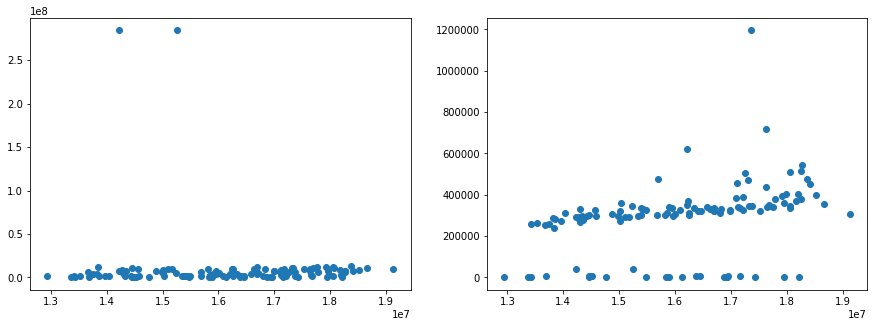

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15,5)) 

ax[0].scatter('month_current', 'Hops (dry)', data = barrels_raw_material) 
ax[1].scatter('month_current', 'Hops (used as extracts)', data = barrels_raw_material); 

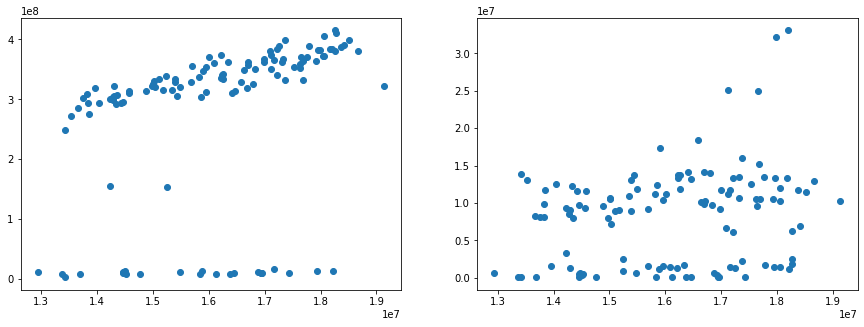

In [47]:
fig, ax = plt.subplots(1,2,figsize=(15,5)) 

ax[0].scatter('month_current', 'Malt and malt products', data = barrels_raw_material) 
ax[1].scatter('month_current', 'Other', data = barrels_raw_material);

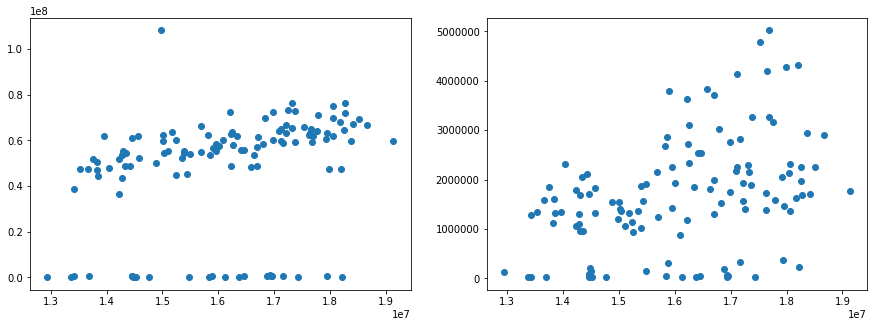

In [48]:
fig, ax = plt.subplots(1,2,figsize=(15,5)) 

ax[0].scatter('month_current', 'Rice and rice products', data = barrels_raw_material) 
ax[1].scatter('month_current', 'Wheat and wheat products', data = barrels_raw_material);

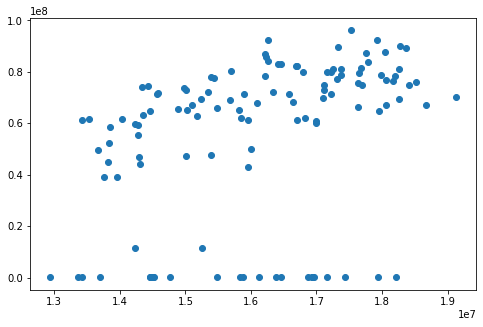

In [49]:
fig, ax = plt.subplots(1,1,figsize=(8,5)) 

ax.scatter('month_current', 'Sugar and syrups', data = barrels_raw_material);

- We observe that the production quantity has a good linear relationship with the variables 'Hops (dry)', 'Hops (used as extracts)','Corn and corn products','Malt and malt products', 'Rice and rice products' and 'Sugar and syrups'
- Lets fit a regression model with treating these variables as predictors and production quantity as reponse

In [50]:
X = barrels_raw_material[['Corn and corn products',
       'Hops (dry)', 'Hops (used as extracts)', 'Malt and malt products',
       'Other', 'Rice and rice products', 'Sugar and syrups']]
y = barrels_raw_material[['month_current']]

In [51]:
# Splitting the data into training and testing data sets
#We will use the by default train_test_split that splits data into 75% train and 25% testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 7586)

In [52]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
model.coef_, model.intercept_

(array([[-0.05482937,  0.00547244,  3.56480121,  0.01804039, -0.01798295,
         -0.05021431,  0.00388838]]), array([14915619.8766795]))

In [43]:
model.coef_, model.intercept_

(array([[-9.01716034e-02, -2.98433073e-02,  1.49613596e-03,
          2.25043189e+00,  5.57657206e-03, -4.48485346e-02,
         -2.14165153e-02,  8.42891720e-03,  9.69640176e-01]]),
 array([15216975.50201243]))

In [54]:
model.score(Xtrain, ytrain)

0.23975380115327505

- Since the model score is very low, and we know that each of these raw materials is used in beer production, let us fit a model using all the variables

In [55]:
X = barrels_raw_material[['Barley and barley products', 'Corn and corn products',
       'Hops (dry)', 'Hops (used as extracts)', 'Malt and malt products',
       'Other', 'Rice and rice products', 'Sugar and syrups',
       'Total Grain products', 'Total Non-Grain products', 'Total Used',
       'Wheat and wheat products']]
y = barrels_raw_material[['month_current']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 7586)

In [56]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
model.coef_, model.intercept_

(array([[-0.27415886, -0.24311097, -0.94238771,  3.47432093, -0.17789844,
         -1.0086845 , -0.25205048, -0.95581912, -0.18632926,  0.5674296 ,
          0.38110034,  0.76088949]]), array([15007668.93957743]))

In [58]:
model.score(Xtrain, ytrain)

0.36131262000082565

In [59]:
model.score(Xtest, ytest)

-0.2633626399537661

- The model score for the training data improves significantly by using all the variables.
- The model score for the testing data comes out to be less than zero. 
- We can conclude that model was able to explain training data, but not the testing data. 
- This implies that either the data cannot explain the behaviour of unseen data, or linear regression is not a righ choice of model. 
- Thus we cannot use this model for further use. We will now try non-linear methods like Decision Tress to predict the Beer production quantity. 

In [64]:
# Fitting a Decision Tree to predict the prodcution quantity

from sklearn import tree
reg_tree = tree.DecisionTreeRegressor()

In [65]:
reg_tree = reg_tree.fit(Xtrain, ytrain)

In [66]:
reg_tree.score(Xtest, ytest)

0.661820631005251

- There is a significant increase in the model score for the testing data when we use a Decision Tree Regressor. 
- The model score comes out to be 66.18% 
- This model can be used to predict the production quantity of beer given these variables 

### Forecasting Beer Production for Year 2020

In `beer_taxed` dataset we have monthwise production of Beer from Jan-2008 to December-2019. Based on that data we will try to forecast monthwise Beer production for 2020

In [44]:
# From beer_taxed_filter keeping only time series data
beer_taxed_ts = beer_taxed_filtered[['year','month','month_current']].reset_index(drop = True)
# Converting into date time format for time series calculations
# Creating new variable and the will append this new variable to original time series variable
date = beer_taxed_ts.apply(lambda x: datetime.date(int(x['year']), x['month'],1),axis=1) # Adding day column for computational simplification
date = pd.to_datetime(date)
beer_taxed_ts['date'] = date
#beer_taxed_ts.append({'date':date}, ignore_index=True)
beer_taxed_ts.head()

,year,month,month_current,date
0,2008,1,16211480,2008-01-01
1,2008,2,15690494,2008-02-01
2,2008,3,17367476,2008-03-01
3,2008,4,17254160,2008-04-01
4,2008,5,18269043,2008-05-01


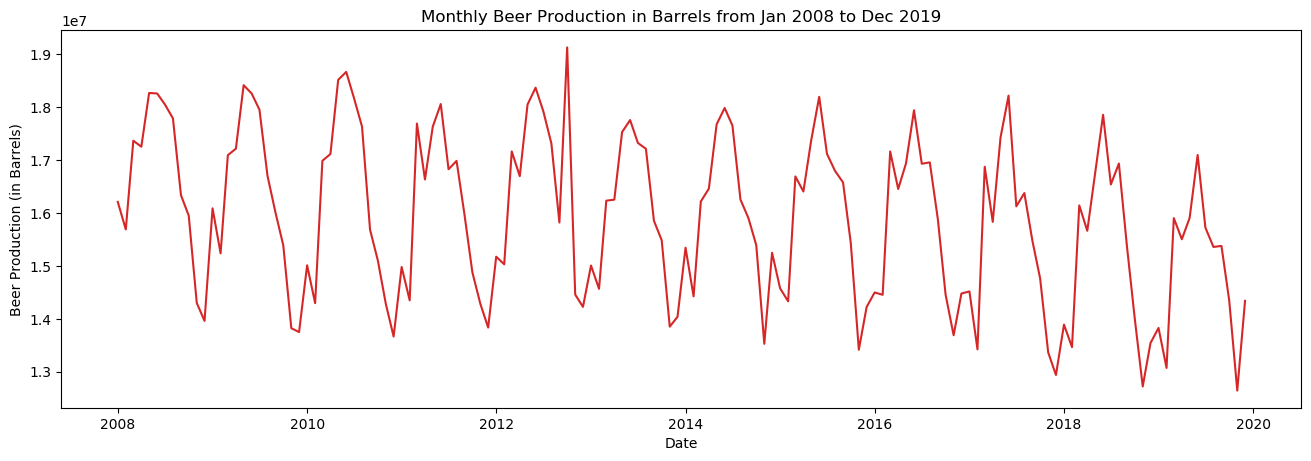

In [45]:
# Plotting Time Series
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Beer Production (in Barrels)', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(beer_taxed_ts, x=beer_taxed_ts.date, y=beer_taxed_ts.month_current, title='Monthly Beer Production in Barrels from Jan 2008 to Dec 2019')  

- It can be seen that there is slight decrease in overall beer production over the years
- The Beer production seem to follow seasonal pattern i.e. in some months the production is high whereas and some it's low. This may be becuase of the availablity in the grains from which the Beer is manufactured follows seasonal pattern

### Building Time Series Model to Predict Beer Production

- First, we will split the time series data from 2008-2018 as training data and 2019 as testing data for building our model
- Model will be based on the results of auto Arima which will be used to predict the nature of time series
- Model performance will be evaluated based on it's performance on 2019 data

The time series will be mannualy split into training and tesing data

In [46]:
# Converting to Univariate Time Series
beer_taxed_ts = beer_taxed_ts.rename(columns={'month_current': 'beer_production'})
beer_taxed_ts.tail()

,year,month,beer_production,date
139,2019,8,15359693,2019-08-01
140,2019,9,15378683,2019-09-01
141,2019,10,14344526,2019-10-01
142,2019,11,12645622,2019-11-01
143,2019,12,14341816,2019-12-01


In [47]:
# Manually Spliting into training and testing data
beer_taxed_ts_train = beer_taxed_ts[beer_taxed_ts.date < '2019-01-01']
beer_taxed_ts_train.tail()

,year,month,beer_production,date
127,2018,8,16936946,2018-08-01
128,2018,9,15376335,2018-09-01
129,2018,10,14017300,2018-10-01
130,2018,11,12722896,2018-11-01
131,2018,12,13544352,2018-12-01


In [48]:
# Tesing Data
beer_taxed_ts_test = beer_taxed_ts[beer_taxed_ts.date >= '2019-01-01']
beer_taxed_ts_test.head()

,year,month,beer_production,date
132,2019,1,13828780,2019-01-01
133,2019,2,13073878,2019-02-01
134,2019,3,15904939,2019-03-01
135,2019,4,15505179,2019-04-01
136,2019,5,15906023,2019-05-01


#### Using Auto Arima to fit the time series model

In [52]:
from pmdarima import auto_arima

Building model using auto arima and train data

In [58]:
#from pyramid.arima import auto_arima
univariate_series_train = beer_taxed_ts_train['beer_production']
ts_model = auto_arima(univariate_series_train, trace=True, error_action='ignore', suppress_warnings=True)
ts_model.fit(univariate_series_train)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=4063.948, BIC=4081.245, Time=0.274 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4139.222, BIC=4144.988, Time=0.005 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=4064.635, BIC=4073.283, Time=0.011 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=4095.878, BIC=4104.526, Time=0.018 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=4757.381, BIC=4760.264, Time=0.003 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=4040.097, BIC=4054.511, Time=0.056 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=4068.864, BIC=4080.395, Time=0.037 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=4066.687, BIC=4078.219, Time=0.030 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=4036.341, BIC=4053.638, Time=0.085 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=4044.705, BIC=4059.

ARIMA(maxiter=50, method='lbfgs', order=(4, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

Forecasting Beer Production for 2019

In [59]:
# Forecasting
univariate_series_test = beer_taxed_ts_test['beer_production']
forecast = ts_model.predict(n_periods=len(univariate_series_test))
forecast = pd.DataFrame(forecast,index = univariate_series_test.index,columns=['Prediction'])

Ploting the predictions

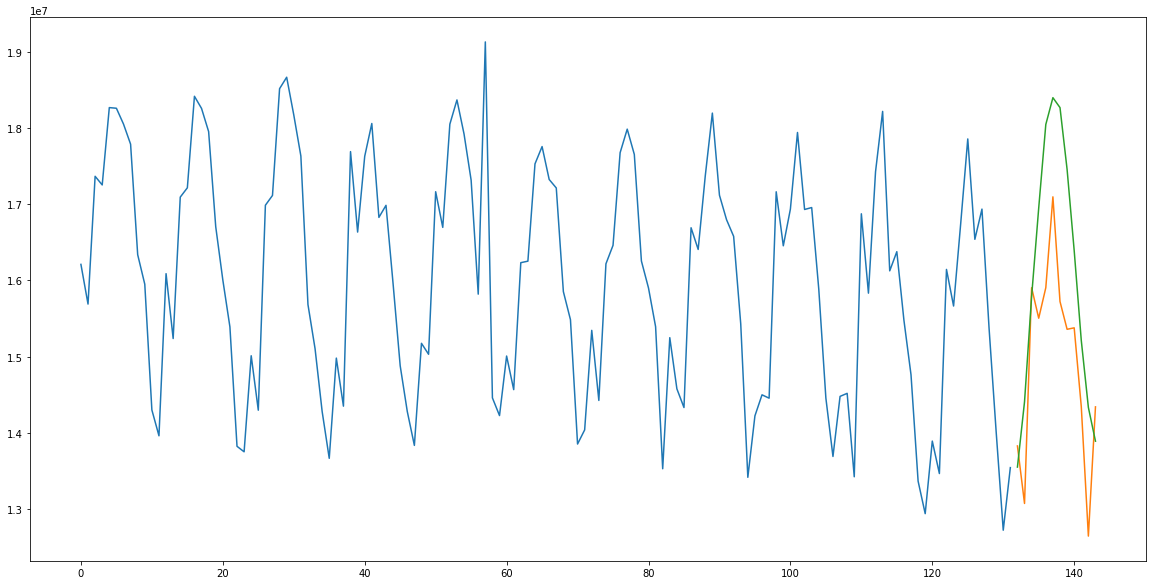

In [60]:
#plot the predictions for validation set
plt.figure(figsize=(20,10))
plt.plot(univariate_series_train, label='Train')
plt.plot(univariate_series_test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

Calculating the testing RMSE score

In [62]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(univariate_series_test,forecast))
print(rms)

1470845.7392591175


Comparing RMSE with the mean of Beer produced in 2019

In [64]:
rms/univariate_series_test.mean()

0.09854295157975977

The root mean squared error is less than 10% of the mean of actual Beer produced in 2019

The final time series model fitted above to estimate the Beer production is ARMA(4,3)

From the time series plot itself we can see that there is seasonality in Beer production

Let us try and fit another time series model using Holt-Winters Method which is preferred for seasonal data

#### Fitting time series model using Holt-Winters Method

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\Sumukh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


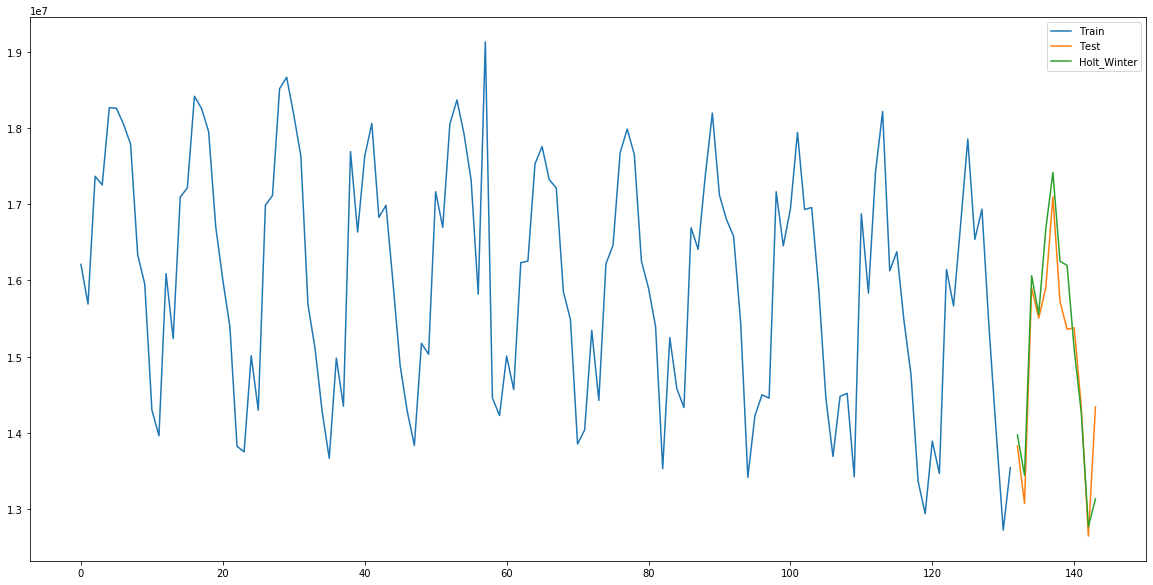

In [70]:
fit1 = ExponentialSmoothing(univariate_series_train ,seasonal_periods=12 ,trend='add', seasonal='add',).fit();
forecast = fit1.forecast(len(univariate_series_test))
plt.figure(figsize=(20,10))
plt.plot(univariate_series_train, label='Train')
plt.plot(univariate_series_test, label='Test')
plt.plot(forecast, label='Holt_Winter')
plt.legend(loc='best')
plt.show();

In [71]:
rms = sqrt(mean_squared_error(univariate_series_test,forecast))
print(rms)

534234.7411785201


In [72]:
rms/univariate_series_test.mean()

0.035792379055806595

To summarise both the models: <br>

| Models              |      RMSE     |
|---------------------|:-------------:|
| Auto ARIMA          |  1470845.74   |
| Holt-Winters Method |  534234.74    |

It can be seen that the RMSE has significantly improve as compared to ARMA model

Our final time series model to forecast Beer production is given by Holt-Winters Method